In [1]:
theta1 = [0.31, 0.18, 0.65, 0.25, 5]  # true values
theta_n1 = [0.372, 0.216, 0.78, 0.3, 6.0] # nominal values +20%
theta_min1 = [0.155, 0.09, 0.325, 0.125, 2.5]   # minimum values -50%
theta_max1 = [0.465, 0.27, 0.975, 0.375, 7.5]  # maximum values +50%
theta_maxs1 = [hi / nom for hi, nom in zip(theta_max1, theta_n1)]
theta_mins1 = [lo / nom for lo, nom in zip(theta_min1, theta_n1)]

In [2]:
system = {
    'tvi': {  # Time-variant input variables (models input: tvi), each key is a symbol nad key in tvi as well
        'u1': {  # Temperature (K)
            'stps': 5,  # Number of switching times in CVPs (vector parametrisation resolution in time dimension):
            # Must be a positive integer > 1. swps-1 is the number of steps
            'const': 'rel',  # Constraint type: relative state of signal levels in CVPs
            # 'rel' (relative) ensures relaxation, 'dec' (decreasing) ensures decreasing signal levels, 'inc' (increasing) ensures increasing signal levels
            'max': 0.2,  # Maximum allowable signal level, des_opt space upper bound
            'min': 0.05,  # Minimum allowable signal level, des_opt space lower bound
            'cvp': 'CPF',  # Design CVP method (CPF - constant profile, LPF - linear profile)
            'offl': 0.01,  # minimum allowed perturbation of signal (ratio)
            'offt': 0.5  # minimum allowed perturbation of time (ratio)
        },
        'u2': {  # Temperature (K)
            'stps': 5,  # Number of switching times in CVPs (vector parametrisation resolution in time dimension):
            # Must be a positive integer > 1. swps-1 is the number of steps
            'const': 'dec',  # Constraint type: relative state of signal levels in CVPs
            # 'rel' (relative) ensures relaxation, 'dec' (decreasing) ensures decreasing signal levels, 'inc' (increasing) ensures increasing signal levels
            'max': 35,  # Maximum allowable signal level, des_opt space upper bound
            'min': 5,  # Minimum allowable signal level, des_opt space lower bound
            'cvp': 'CPF',  # Design CVP method (CPF - constant profile, LPF - linear profile)
            'offl': 5,  # minimum allowed perturbation of signal (ratio)
            'offt': 0.5  # minimum allowed perturbation of time (ratio)
        },
    },
    'tvo': {  # Time-variant output variables (responses, measured or unmeasured)
        'y1': {  # response variable, here carbonation efficiency
            'init': 0,  # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,  # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 6,  # the amound of samples per each round (run)
            'unc': 0.05,  # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 0.5,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 10],  # fixed sampling times
        },
        'y2': {  # response variable, here carbonation efficiency
            'init': 0,  # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,  # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 6,  # the amound of samples per each round (run)
            'unc': 0.05,  # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 0.5,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 10],  # fixed sampling times
        },
    },
    'tii': {  # Time-invariant input variables (tii)
        'y10': {  # 1st symbolic time-invariant control, Density of solid reactant (kg/m³)
            'max': 10,  # Maximum allowable signal level, des_opt space upper bound
            'min': 1  # Minimum allowable signal level, des_opt space upper bound
        },
        'y20': {  # 1st symbolic time-invariant control, Density of solid reactant (kg/m³)
            'max': 10,  # Maximum allowable signal level, des_opt space upper bound
            'min': 1  # Minimum allowable signal level, des_opt space upper bound
        },
    },
    'tio': {  # Time-invariant output variables (empty here, could hold steady state responses that hold no dependency)
    },
    't_s': [0, 10],  # Time span  (600 s to 10,800 s), duration of numerical perturbations (the rest is precluded from des_opt)
    't_r': 0.02,  # Time resolution (10 s), minimum time steps for the simulation/des_opt/controls
    't_d': 0.5
}

In [3]:
models = { # Settings related to the rival models and their parameters
    'can_m': ['M'],  # Active solvers (rival models) to be used in the experiment
    'krt': {'M': 'pys'},  # Kernel type for each model, 'pys' for python standalone scripts, 'pym' for middoe.krnl_models, 'gpr' for gPAS models
    # type of the model interface, 'pym' for middoe.krnl_models, 'gpr' for gPAS models, function name for globally defined functions, 'pys' for python standalone scripts
    'creds': {'M': '@@TTmnoa698'},
    # credentials for gPAS models, if not needed, leave empty
    'src': {'M': 'C:/Users/Tadmin/PycharmProjects/middoe/tests/poster/case 1/model.py'},
    # for now for gPAS readable files, or python standalone scripts

    'theta': { # Theta parameters for each models
        'M': theta_n1
    },
    't_u': { # Maximum bounds for theta parameters (based on normalized to'f20': theta20mins, 1)
        'M': theta_maxs1
    },
    't_l': { # Minimum bounds for theta parameters (based on normalized to 1)
        'M': theta_mins1
    }
}

In [5]:
insilicos = { # Settings for the insilico data generation
    'tr_m': 'M', # selected true models (with nominal values)
    'theta': theta1,
    'errt': 'rel',  # error type, 'rel' for relative error, 'abs' for absolute error
    'prels': {
        '1': {'u1': 0.125, 'u2':20, 'y10': 5.5, 'y20': 5.5},
        '2': {'u1': 0.2, 'u2':35, 'y10': 10, 'y20': 10},
    }
}

In [6]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, design_decisions={}, expr=1)


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 1\indata.xlsx
[INFO] Model used         : M
[INFO] Design case        : classic/preliminary
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.05
   - y2         | measurable      | std.dev = 0.05


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/poster/case 1/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_E:y1  MES_X:y2      MES_Y:y2      MES_E:y2  \
 0         0.0  5.385603  0.275000       0.0  5.374275e+00  2.750000e-01   
 1         2.0  3.780729  0.172277       2.0  1.832488e+00  8.883274e-02   
 2         4.0  1.978521  0.094483       4.0  1.708476e-10  8.751798e-12   
 3         6.0  0.854410  0.044630       6.0  1.381642e-15  6.142581e-17   
 4         8.0  0.412103  0.021082       8.0  3.968578e-16  2.084867e-17   
 ..        ...       ...       ...       ...           ...           ...   
 496       NaN       NaN       NaN       NaN           NaN           NaN   
 497       NaN       NaN       NaN       NaN           NaN           NaN   
 498       NaN       NaN       NaN       NaN           NaN           NaN   
 499       NaN       NaN       NaN       NaN           NaN           NaN   
 500       NaN       NaN       NaN       NaN           NaN           NaN   


In [7]:
expera(system, models, insilicos, design_decisions={}, expr=2)


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 1\indata.xlsx
[INFO] Model used         : M
[INFO] Design case        : classic/preliminary
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.05
   - y2         | measurable      | std.dev = 0.05


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/poster/case 1/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_E:y1  MES_X:y2      MES_Y:y2      MES_E:y2  \
 0         0.0  9.970513  0.500000       0.0  9.789354e+00  5.000000e-01   
 1         2.0  4.837424  0.238966       2.0  8.518908e-14  4.345494e-15   
 2         4.0  1.726040  0.097156       4.0  2.101537e-11  9.823341e-13   
 3         6.0  0.846879  0.039501       6.0  0.000000e+00  6.409554e-14   
 4         8.0  0.346373  0.016060       8.0  0.000000e+00  5.231386e-13   
 ..        ...       ...       ...       ...           ...           ...   
 496       NaN       NaN       NaN       NaN           NaN           NaN   
 497       NaN       NaN       NaN       NaN           NaN           NaN   
 498       NaN       NaN       NaN       NaN           NaN           NaN   
 499       NaN       NaN       NaN       NaN           NaN           NaN   
 500       NaN       NaN       NaN       NaN           NaN           NaN   


In [8]:
from middoe.log_utils import  read_excel
data = read_excel('indata')

[INFO] Reading from indata.xlsx


In [9]:
iden_opt = { # Settings for the parameter estimation process
    'meth': 'Ls',  # optimisation method, 'G': Global Differential Evolution, 'Ls': Local SLSQP, 'Ln': Local Nelder-Mead
    'init': None,   # use 'rand' to have random starting point and use None to start from theta_parameters nominal values (to be avoided in insilico studies)
    'eps': 1e-4,  # perturbation size of parameters in SA FDM method (in a normalized to 1 space)
    #usually 1e-3, or None to perform a mesh independency test, and auto adjustment
    'ob': 'WLS',  #loss function, 'LS': least squares, 'MLE': maximum likelihood, 'Chi': chi-square, 'WLS': weighted least squares
    'c_plt': True, # plot the confidence volumes
    'f_plt': True, # plot the fitting results
    'plt_s': True, # show plots while saving
    'log': True # log the results
}

In [10]:
from middoe.iden_parmest import parmest
resultpr = parmest(system, models, iden_opt, data)

Objective function: 'WLS'| model 'M' | CPU time 0.0826 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0979 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0918 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1078 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0908 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0866 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0628 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0760 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0596 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0644 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0761 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0731 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0905 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0935 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0882 seconds.
Objective function: 'WLS'| model 'M' | C

C:\Users\Tadmin\PycharmProjects\middoe\.venv\Lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Objective function: 'WLS'| model 'M' | CPU time 0.0851 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0888 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0815 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0840 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0799 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0817 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0814 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0825 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0785 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0815 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0807 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0792 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0803 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0824 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0840 seconds.
Objective function: 'WLS'| model 'M' | C

In [11]:
from middoe.iden_uncert import uncert
uncert_results = uncert(data, resultpr, system, models, iden_opt)
resultun = uncert_results['results']
theta_parameters = uncert_results['theta_parameters']
solver_parameters = uncert_results['solver_parameters']
scaled_params = uncert_results['scaled_params']
obs = uncert_results['obs']

Estimated parameters of M: [0.4174235633972362, 0.18871765825369544, 0.9738718861343159, 0.27867738913713375, 5.56359746853397]
True parameters of M: [0.372, 0.216, 0.78, 0.3, 6.0]
LS objective function value for M: 0.1306726722467997
T-values of model M: [ 0.64961312  0.0528104   7.79818958 14.44696249  1.17067158]
P-value of model:M is 100.0 for model discrimination
R2 values for responses in model M:
  y1: 0.9993
  y2: 0.9994


Estimability analysis for round 1 is running
Parameter ranking from most estimable to least estimable for M in round 1: [0, 3, 2, 1, 4]
J_theta : 52.26906889871988
P-value of model:M is 100.0 for model discrimination
J_k 1 parameters: 258.20190511802355
rC 1 parameters: 51.48320905482592
rCKub parameters: 50.48320905482592
rCC parameters: 8.247201509137653
P-value of model:M is 100.0 for model discrimination
J_k 2 parameters: 71.67946606966355
rC 2 parameters: 6.470132390314556
rCKub parameters: 5.470132390314556
rCC parameters: 0.5587665487893195


C:\Users\Tadmin\PycharmProjects\middoe\.venv\Lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


P-value of model:M is 100.0 for model discrimination
J_k 3 parameters: 52.12851854291142
rC 3 parameters: -0.07027517790422877
rCKub parameters: -0.035137588952114385
rCC parameters: -0.08626146574600953
P-value of model:M is 100.0 for model discrimination
J_k 4 parameters: 51.900748141606456
rC 4 parameters: -0.36832075711342327
rCKub parameters: -0.24554717140894886
rCC parameters: -0.051897798808706194


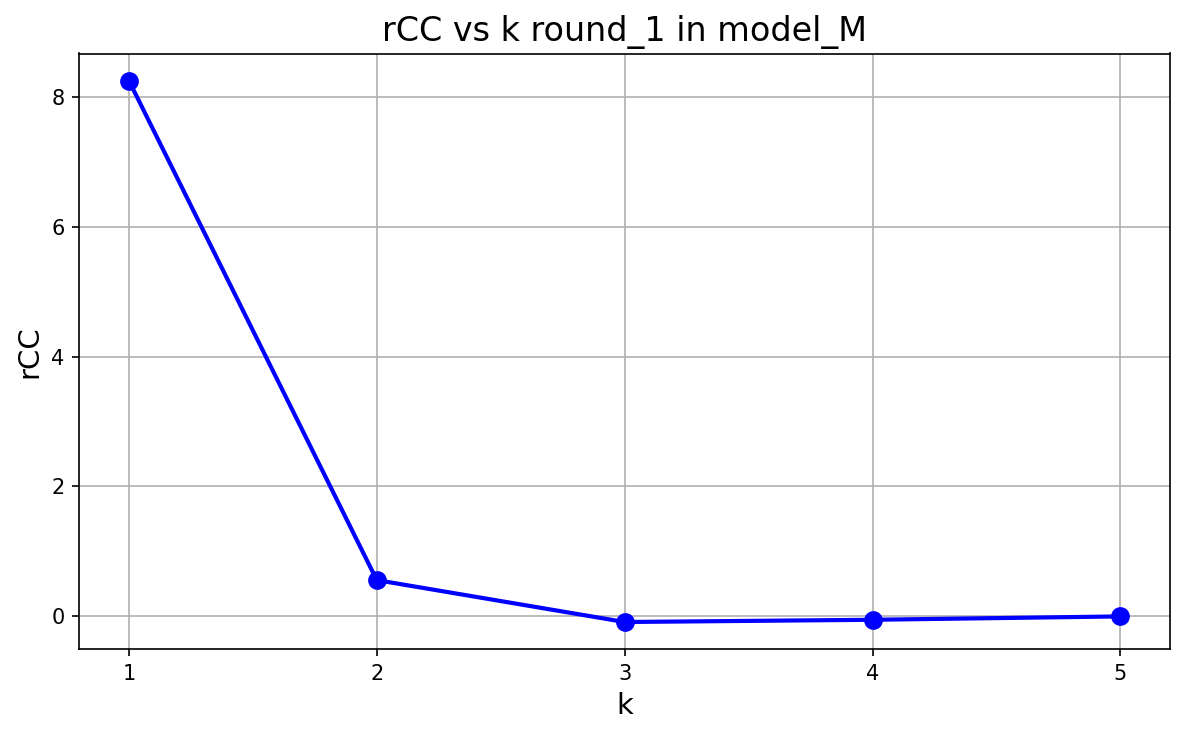

Optimal number of parameters to estimate for M: 3


In [12]:
from middoe.sc_estima import estima
j = 1
ranking, k_optimal_value, rCC_values, J_k_values, best_uncert_result = estima(resultun, system, models, iden_opt, j, data)

C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_utils.py:531: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * np.sqrt(vals)


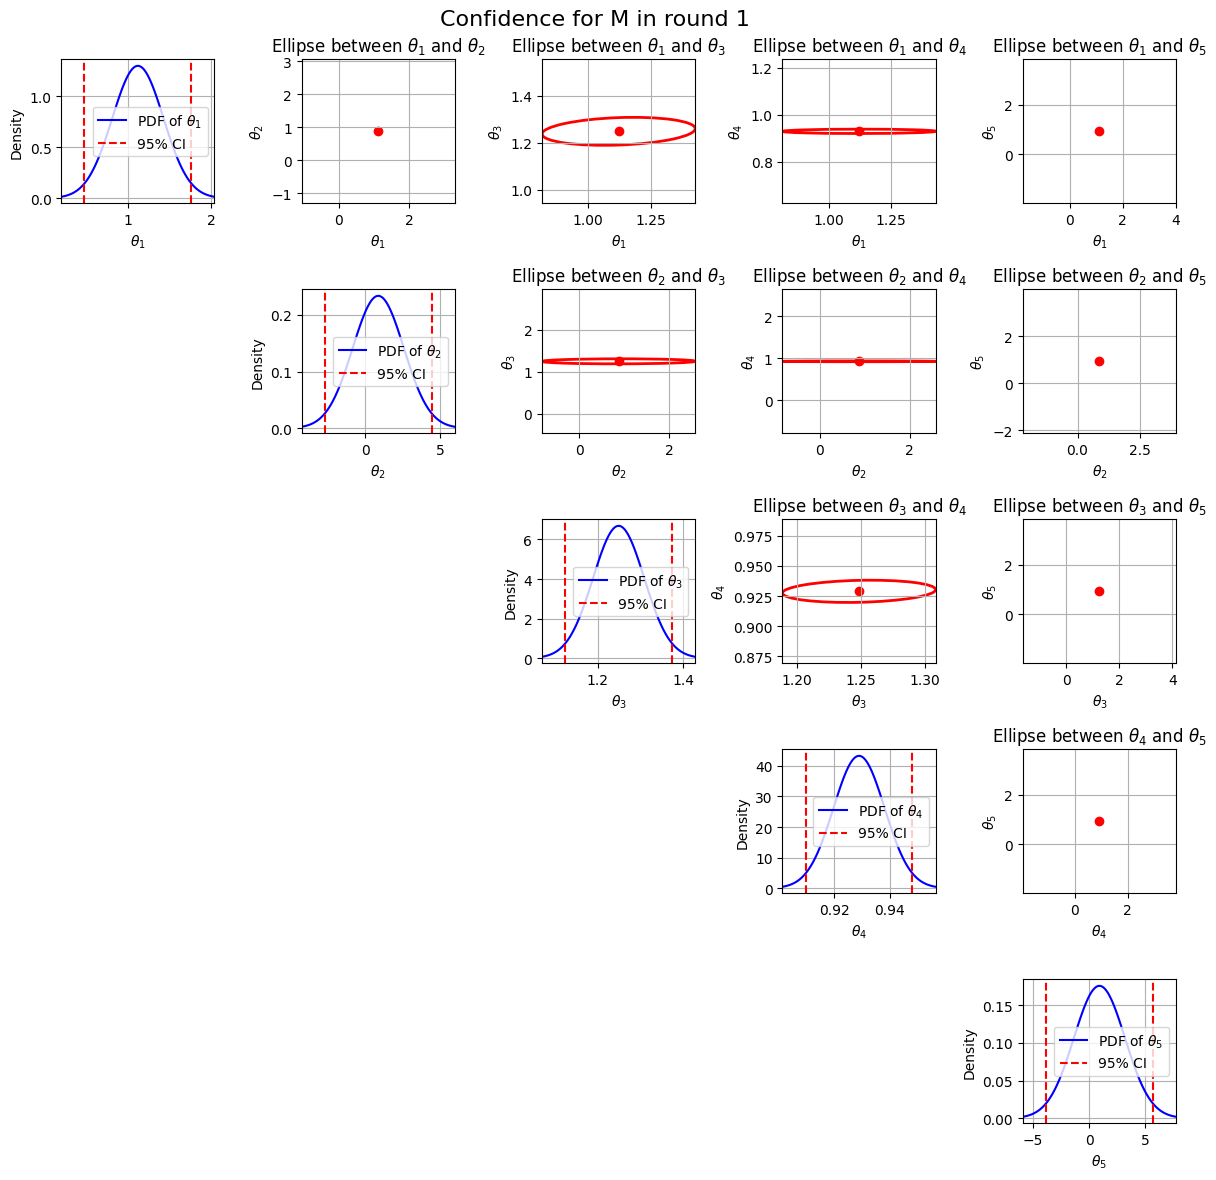

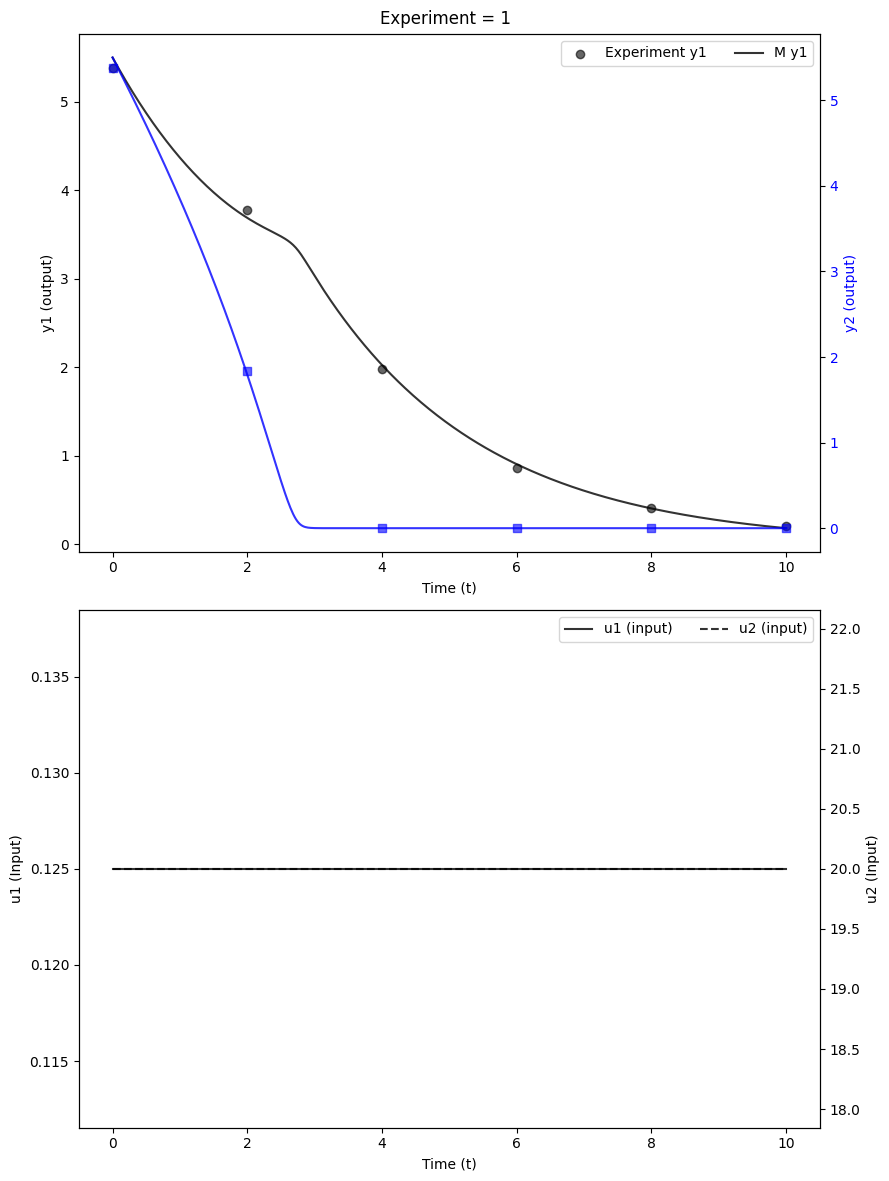

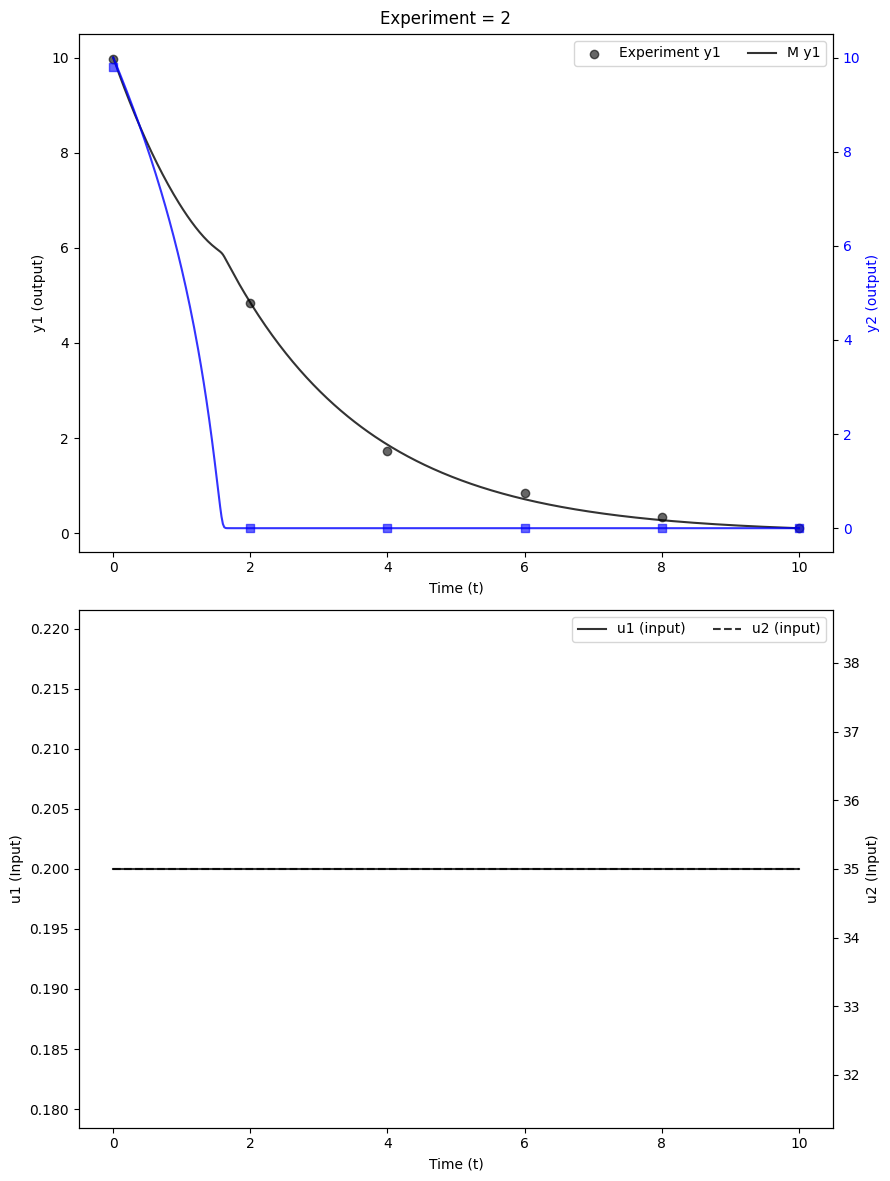

reference t value for model M and round 1: 2.093024054408263
estimated t values for model M and round 1: [ 0.64961312  0.0528104   7.79818958 14.44696249  1.17067158]
P-value for model M and round 1: 100.0
eps for model M and round 1: 0.0001



{'M': np.float64(2.093024054408263)}

In [13]:
from middoe.log_utils import  save_rounds
round_data={}
round = 1
save_rounds(round, resultun, theta_parameters, 'preliminary', round_data, models, scaled_params,iden_opt,solver_parameters, obs, data, system, ranking= ranking, k_optimal_value= k_optimal_value, rCC_values= rCC_values, J_k_values= J_k_values, best_uncert_result=best_uncert_result)

In [14]:
from middoe.log_utils import save_to_jac
save_to_jac(round_data, purpose="iden")

[INFO] Results saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 1\iden_results.jac


INFO:middoe.iden_utils:Starting pcomp_plot.


Loaded: iden_results.jac
File not found: sensa_results.jac


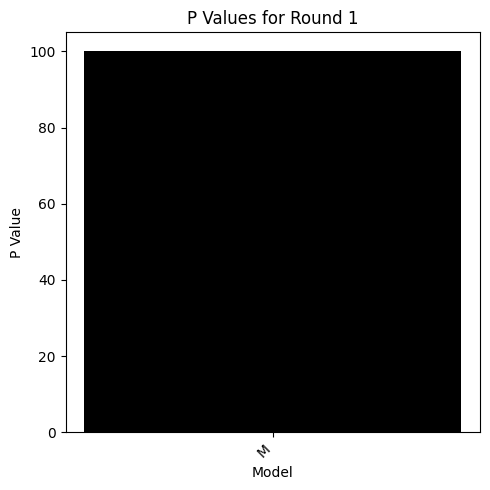

INFO:middoe.iden_utils:P values plot for Round 1 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 1\post_processing\p_values_round_1.png.
INFO:middoe.iden_utils:Starting tcomp_plot.


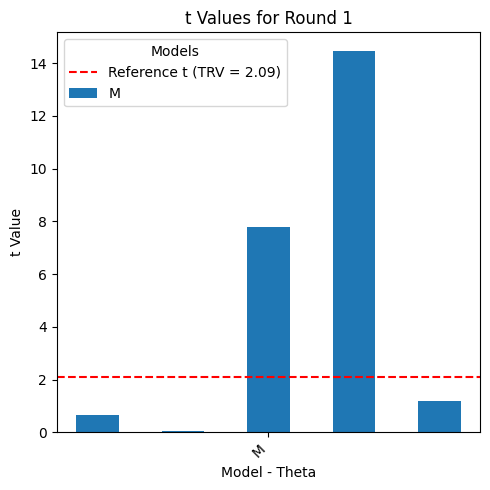

INFO:middoe.iden_utils:T values plot for Round 1 saved to C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 1\post_processing\t_values_round_1.png.


Post-processing model: M


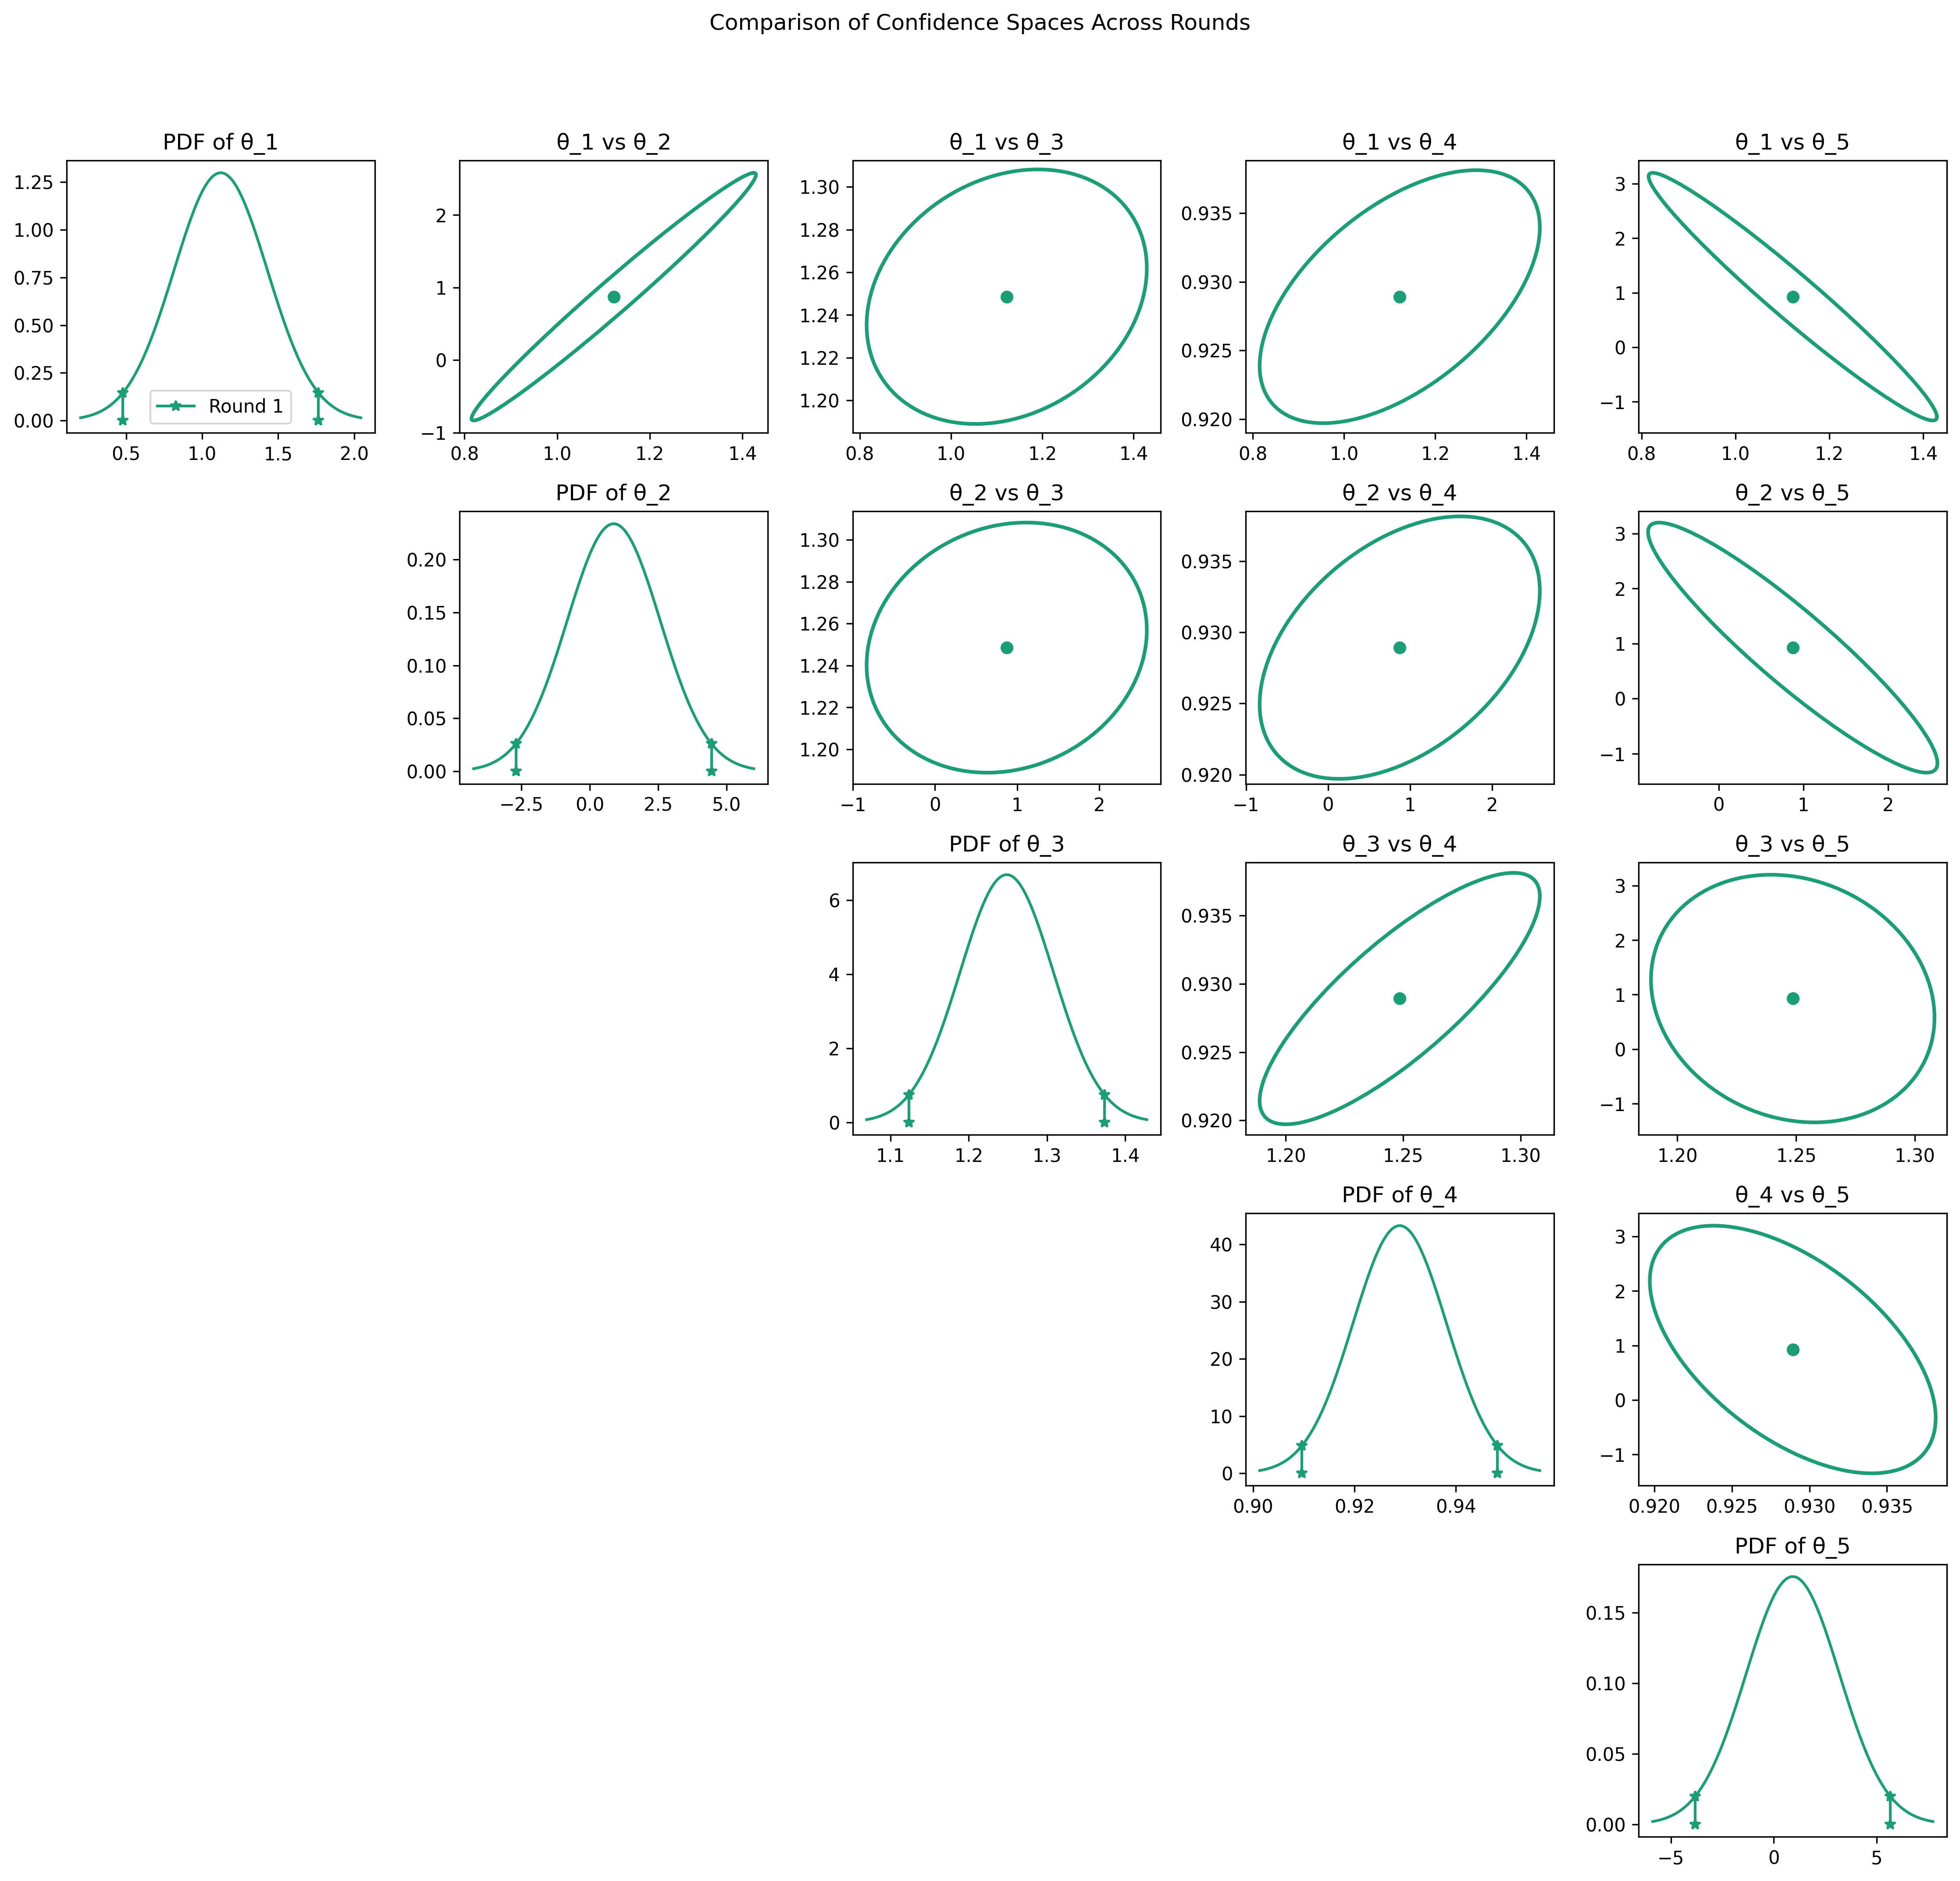

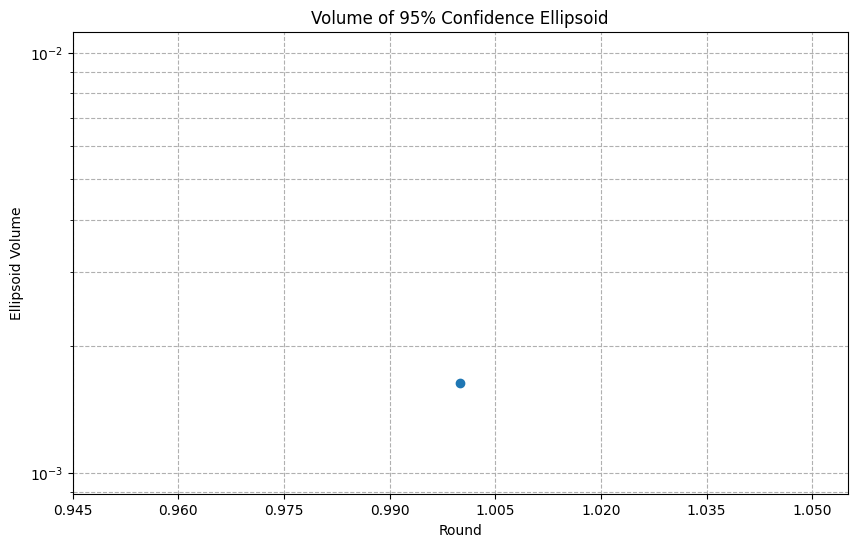

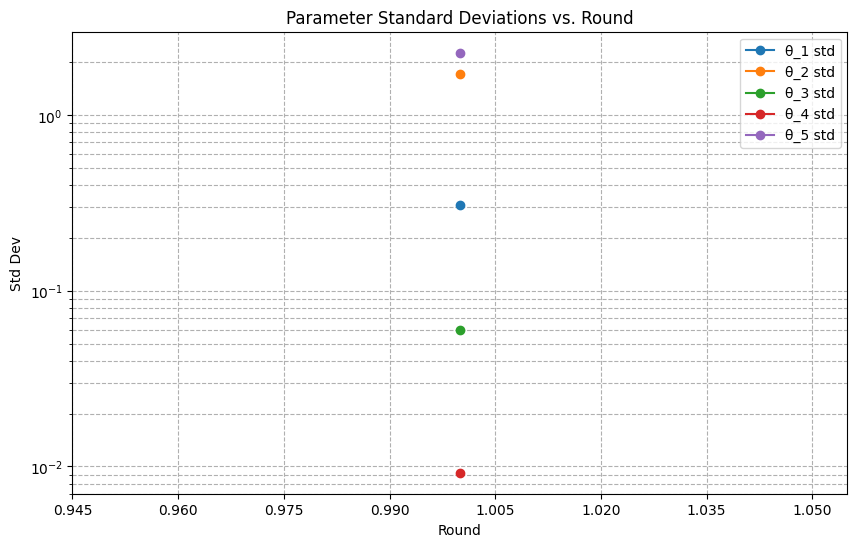

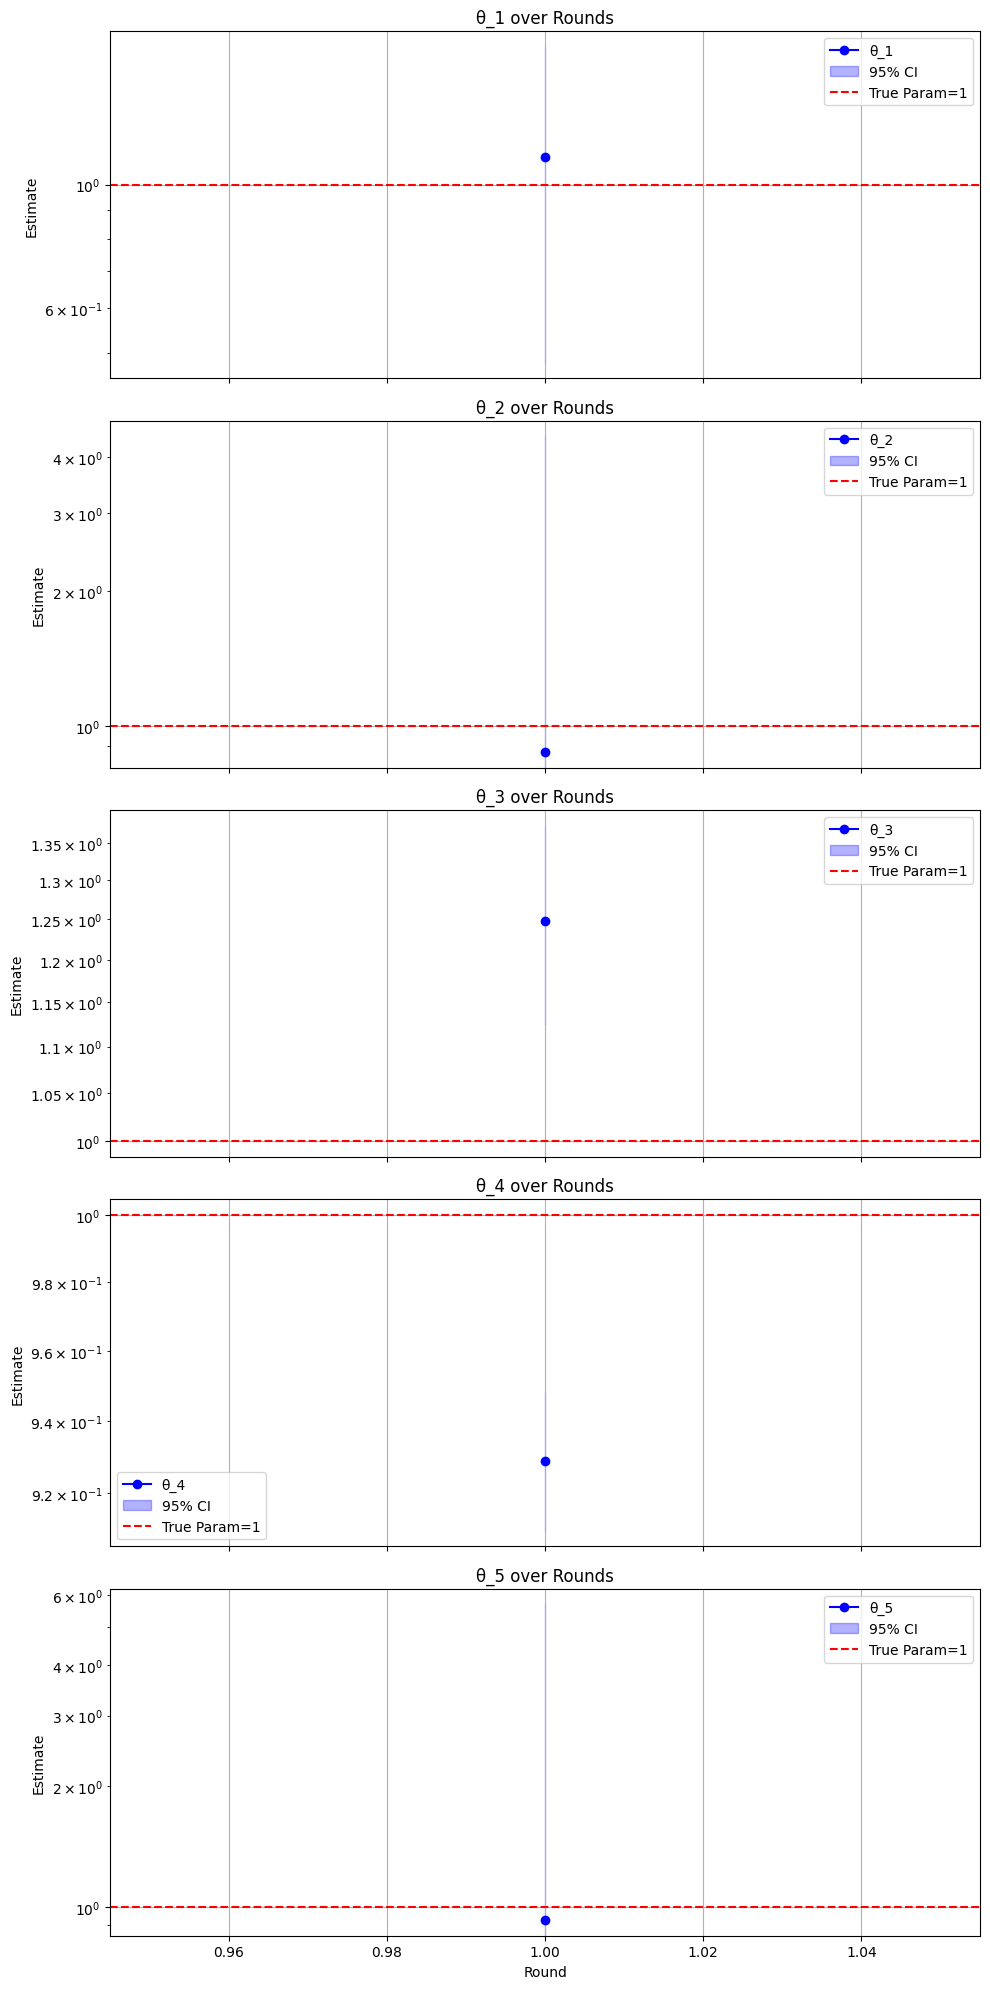

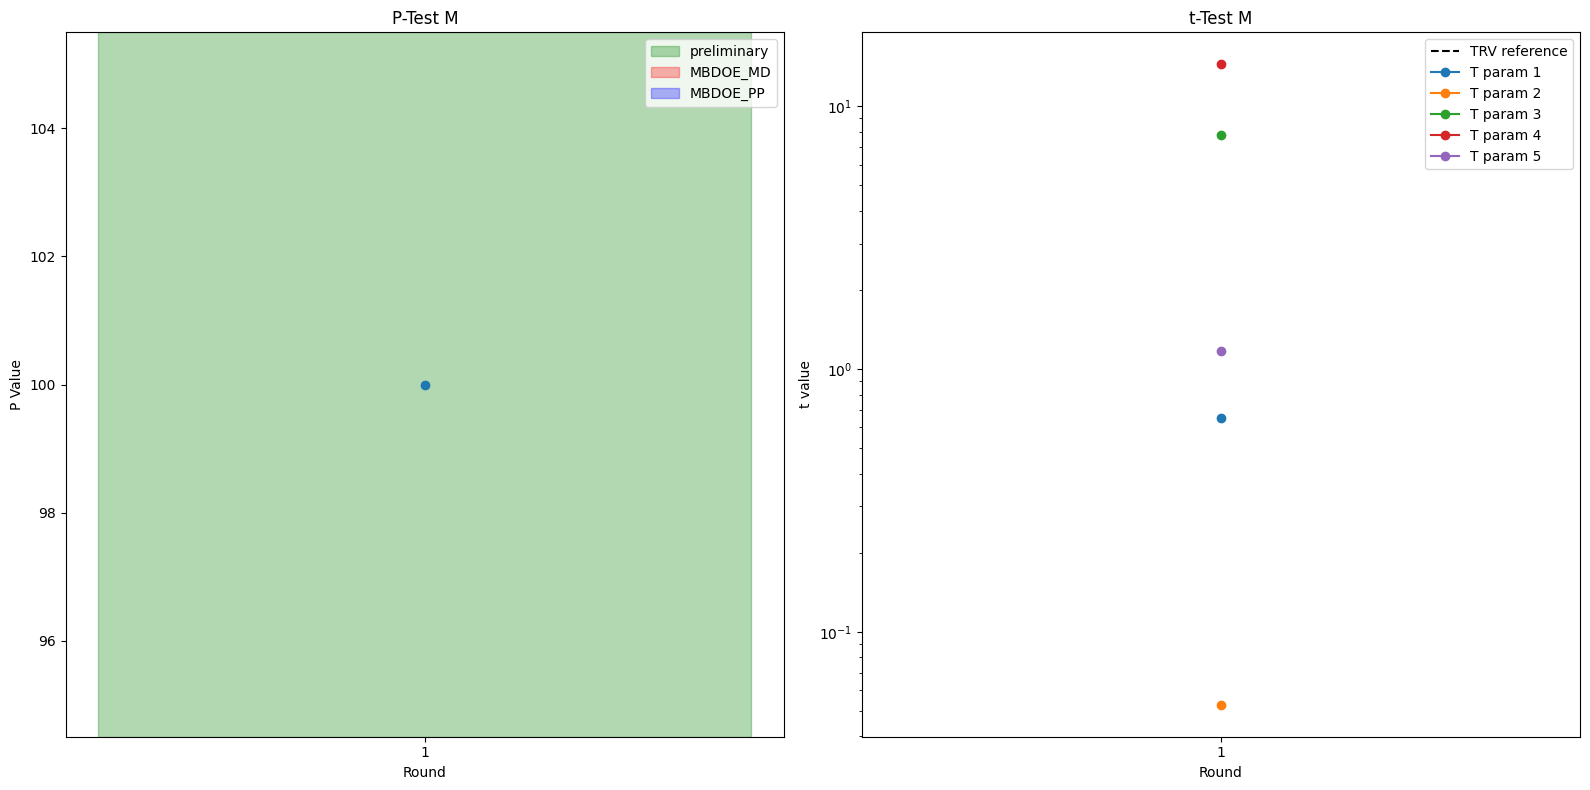

INFO:middoe.iden_utils:Reporter wrote data for Round 1 to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 1\post_processing\M_report_1.xlsx'.
INFO:middoe.iden_utils:Summary written to 'C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 1\post_processing\M_report_summary.txt'.


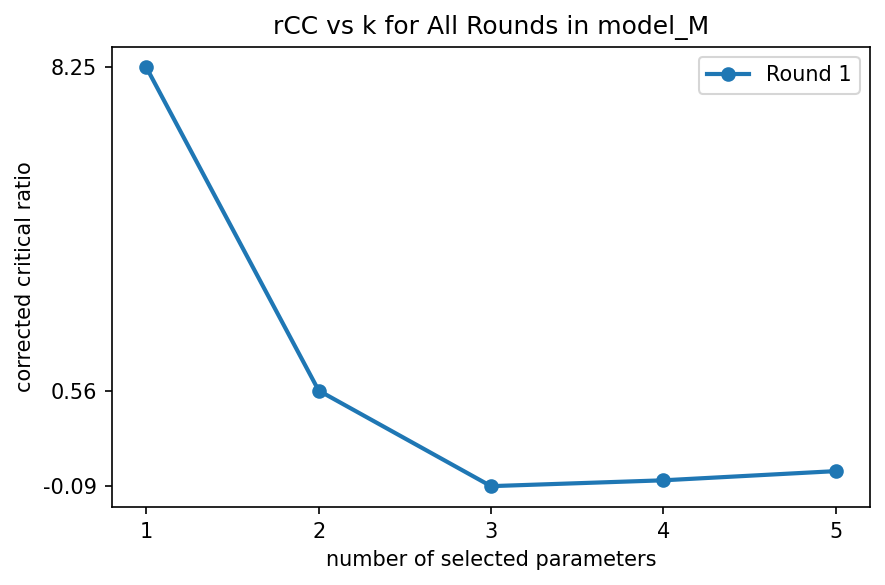

Plot saved in C:\Users\Tadmin\PycharmProjects\middoe\tests\poster\case 1\post_processing\estimability
Post-processing completed for: M


In [15]:

from middoe.log_utils import load_from_jac

results = load_from_jac()
iden = results['iden']

from middoe.iden_utils import run_postprocessing
run_postprocessing(
    round_data=results['iden'],
    solvers=['M'],
    selected_rounds=[ 1],
    plot_global_p_and_t=True,
    plot_confidence_spaces=True,
    plot_p_and_t_tests=True,
    export_excel_reports=True,
    plot_estimability=True
)